<a href="https://colab.research.google.com/github/Aqeel-AHT/skills-introduction-to-github/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow

In [1]:
!pip install keras

# ***Processing***

In [29]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# ***Display Orignal Data***

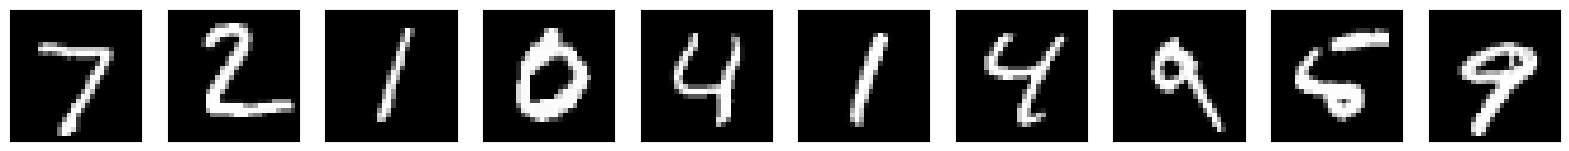

In [30]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i]. reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# ***Setteing up Parameters***

In [31]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 100
classes = 10
epochs = 10

In [32]:
print("Previous X_train shape:{}/nPrevious Y_train shape:{}" .format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)
print("New X_train shape:{}/nNew Y_train shape:{}" .format(X_train.shape, Y_train.shape))

Previous X_train shape:(60000, 28, 28)/nPrevious Y_train shape:(60000,)
New X_train shape:(60000, 784)/nNew Y_train shape:(60000, 10)


# ***Building The FCN Model***

In [33]:
### 4.Build the model
model = Sequential()
model.add(Dense(20, input_dim=input_size, activation='relu'))
#output = relu (dot (W,input) + bias)
model.add(Dense(100, activation='relu'))
model.add(Dense(classes, activation='softmax'))

# Comilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,810 (73.48 KB)

 Trainable params: 18,810 (73.48 KB)

 Non-trainable params: 0 (0.00 B)

# ***Training The Model***

In [34]:
from time import time   # Import Necessary Libraries

# Record the current time to measure training time
tic = time()

# fit the model on the training data
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

 # Calculate and print the time taken for model training
print("Model Training took{} Secs". format(toc - tic))

# Testing the trained Model , Test 10

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6900 - loss: 1.0518 - val_accuracy: 0.9238 - val_loss: 0.2549
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9281 - loss: 0.2494 - val_accuracy: 0.9407 - val_loss: 0.2009
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9422 - loss: 0.1990 - val_accuracy: 0.9449 - val_loss: 0.1770
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9512 - loss: 0.1670 - val_accuracy: 0.9499 - val_loss: 0.1647
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9564 - loss: 0.1472 - val_accuracy: 0.9555 - val_loss: 0.1467
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9593 - loss: 0.1353 - val_accuracy: 0.9585 - val_loss: 0.1416
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9642 - loss: 0.1214 - val_accuracy: 0.9604 - val_loss: 0.1341
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9660 - loss: 0.1155 - val_accuracy: 0.

# ***Tsting The Model***


Test Accuracy:0.9589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


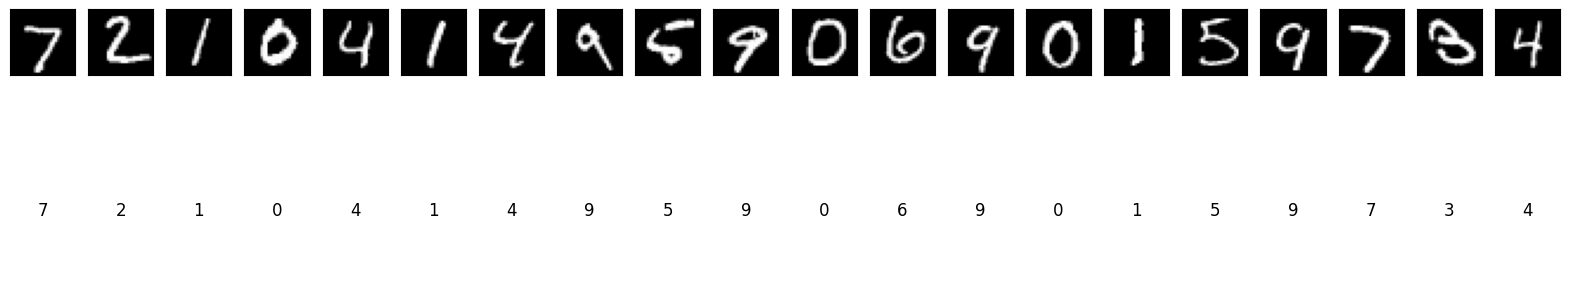

In [35]:
# import Necrssory Libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)

# Convert predicted probabilities to class labels
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest Accuracy:{}". format(test_accuracy))

# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visulization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict Probabilities for the slected validation Samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

#Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
  #Diplay the orignal images
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_valid[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Display the predicted digit
  predicted_digit = np.argmax(y_pred_probs_valid[i])
  ax = plt.subplot(2, n, i + 1 + n)
  plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
  plt.axis('off')
# Show the plotted images
plt.show()

# Close the plot
plt.close()